In [4]:
%cd "F:\University\Master's Thesis\Datasets\rnd"

F:\University\Master's Thesis\Datasets\rnd


In [5]:
import torch
import numpy as np
import pandas as pd
import shutil

from darts import TimeSeries
from darts.models import NHiTSModel, TiDEModel, TFTModel, TCNModel, BlockRNNModel
from darts.datasets import AusBeerDataset
from darts.dataprocessing.transformers.scaler import Scaler
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from darts.metrics import mae, mse, mape

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

F:\Software\Anaconda\envs\deeplearning-env\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 6.0.1 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [16]:
import copy
from pathlib import Path

# List of columns you want to read
selected_columns = ["Timestamp [s]", "CPU usage [%]", "Memory usage [%]"]

file_path = 'VM001.csv'
df = pd.read_csv(file_path, usecols=selected_columns)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


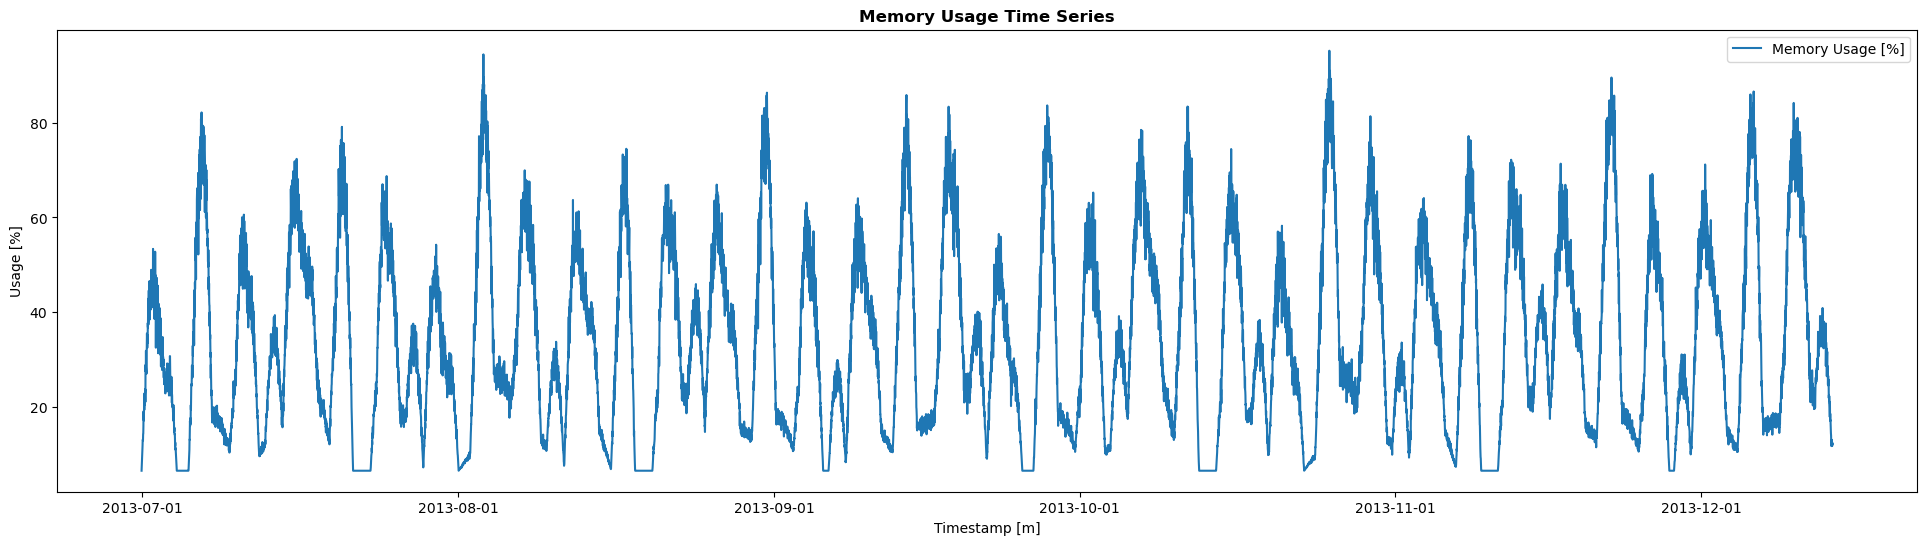

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Add this line

series = TimeSeries.from_dataframe(df, "Timestamp [s]", 'Memory usage [%]')
df = series.pd_dataframe()
df["Timestamp [s]"] = df.index

# Downsample data
downsampled_df = df[::20]

plt.rcdefaults()

# Plotting using Matplotlib
plt.figure(figsize=(24, 6))
plt.plot(downsampled_df['Timestamp [s]'], downsampled_df['Memory usage [%]'], label='Memory Usage [%]')

# Bold the title
plt.title('Memory Usage Time Series', fontweight='bold')

# Adding labels and title
plt.xlabel('Timestamp [m]')
plt.ylabel('Usage [%]')
plt.legend()

# Turn off grid lines for the x-axis
plt.grid(False, axis='x')

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.savefig('memory_trend.png')
# Show the plot
plt.show()


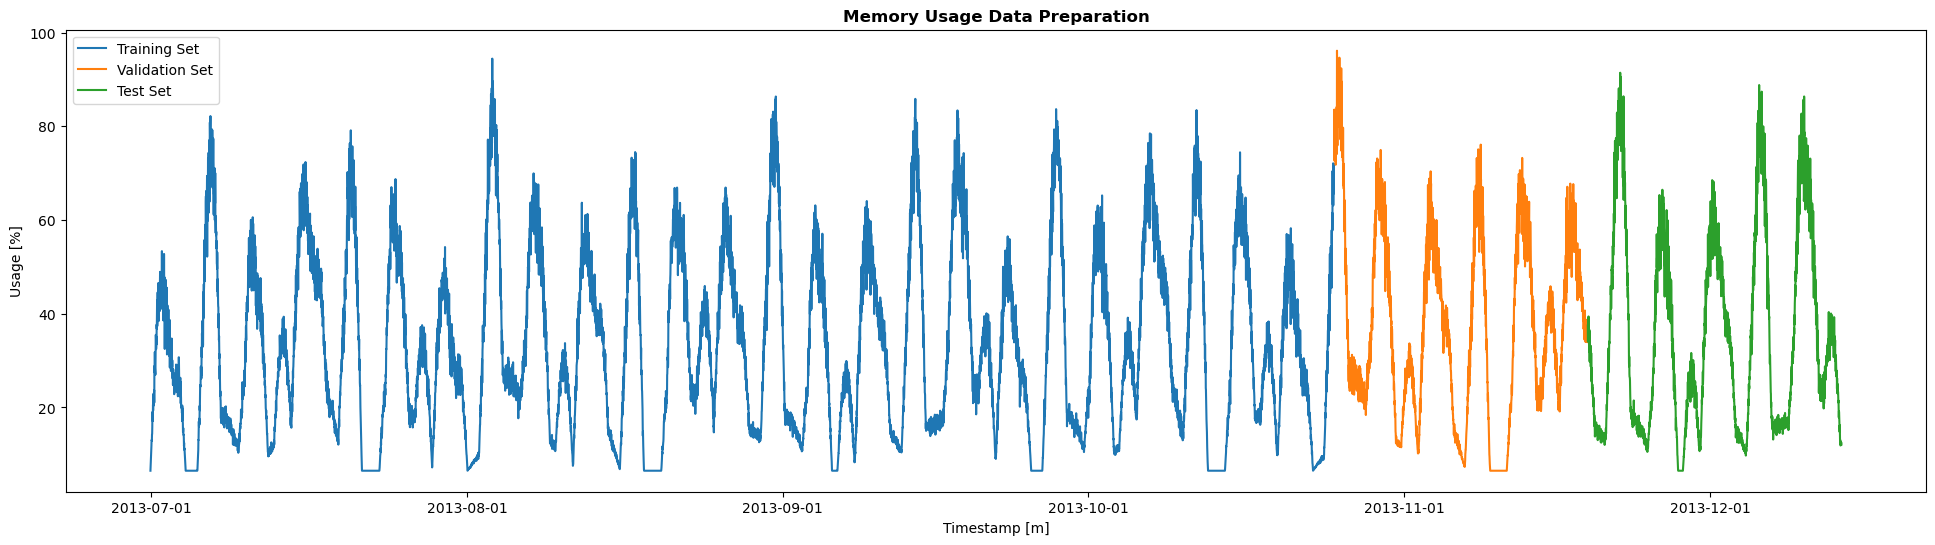

In [18]:
# Convert 'Timestamp [ms]' to datetime and set it as the index
df.set_index('Timestamp [s]', inplace=True)

# Preserve the 'Timestamp [ms]' column
df['Timestamp [s]'] = df.index

# Create a Darts TimeSeries object
series = TimeSeries.from_dataframe(df, "Timestamp [s]", 'Memory usage [%]')

train, temp = series.split_after(0.7)
val, test = temp.split_after(0.5)

# Converting to dataframe for plotting
train_df = train.pd_dataframe()
val_df = val.pd_dataframe()
test_df = test.pd_dataframe()


# Setting the timestamp column again
train_df["Timestamp [s]"] = train_df.index
val_df["Timestamp [s]"] = val_df.index
test_df["Timestamp [s]"] = test_df.index

# Downsizing the dataframe for better visualization
train_df = train_df[::20]
val_df = val_df[::20]
test_df = test_df[::20]

plt.figure(figsize=(24, 6))

# Plotting the timeseries
plt.plot(train_df['Timestamp [s]'], train_df['Memory usage [%]'], label='Training Set')
plt.plot(val_df['Timestamp [s]'], val_df['Memory usage [%]'], label='Validation Set')
plt.plot(test_df['Timestamp [s]'], test_df['Memory usage [%]'], label='Test Set')

# Bold the title
plt.title('Memory Usage Data Preparation', fontweight='bold')

# Adding labels and title
plt.xlabel('Timestamp [m]')
plt.ylabel('Usage [%]')
plt.legend()

# Turn off grid lines for the x-axis
plt.grid(False, axis='x')

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.savefig('memory_trend_prepared.png')
# Show the plot
plt.show()

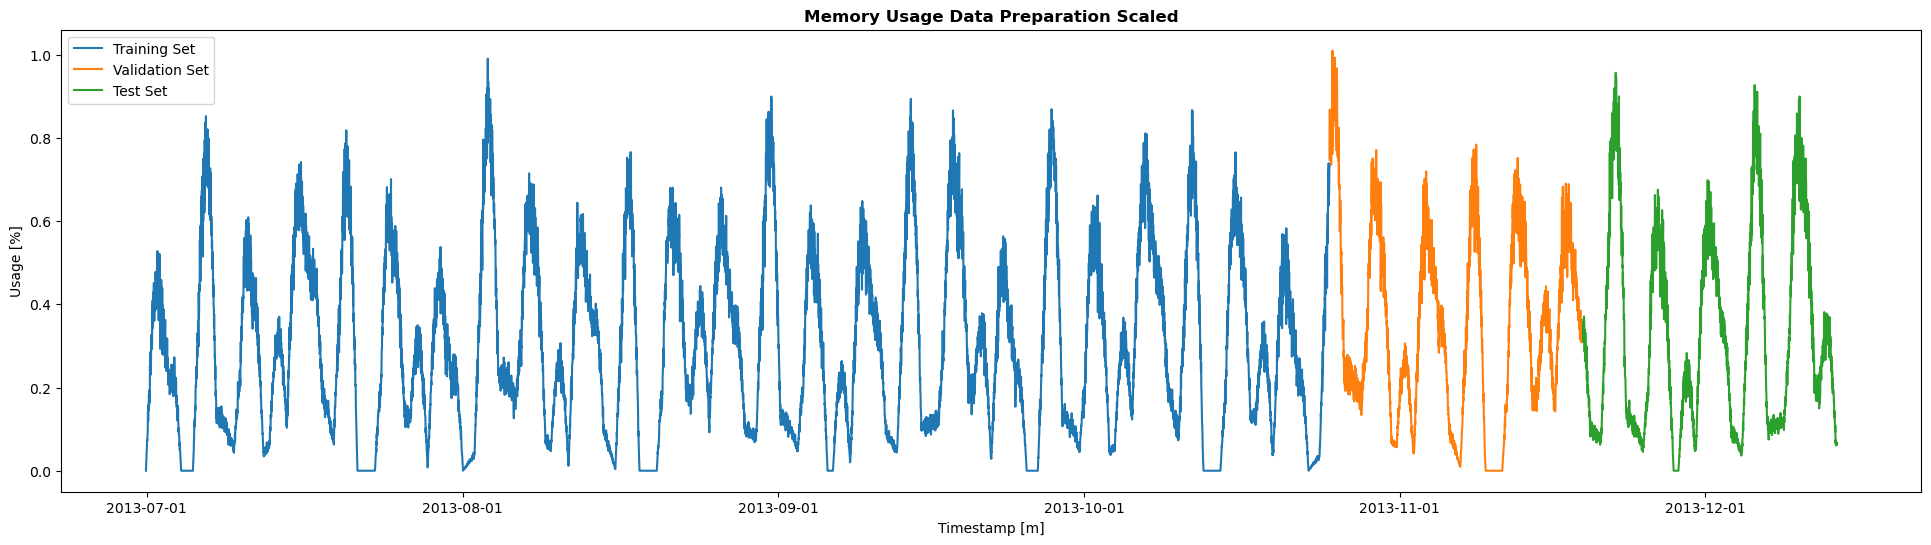

In [19]:
# Scaling the data
scaler = Scaler()  # default uses sklearn's MinMaxScaler
train = scaler.fit_transform(train)
val = scaler.transform(val)
test = scaler.transform(test)


# Converting to dataframe for plotting
train_df = train.pd_dataframe()
val_df = val.pd_dataframe()
test_df = test.pd_dataframe()


# Setting the timestamp column again
train_df["Timestamp [s]"] = train_df.index
val_df["Timestamp [s]"] = val_df.index
test_df["Timestamp [s]"] = test_df.index

# Downsizing the dataframe for better visualization
train_df = train_df[::20]
val_df = val_df[::20]
test_df = test_df[::20]

plt.figure(figsize=(24, 6))

# Plotting the timeseries
plt.plot(train_df['Timestamp [s]'], train_df['Memory usage [%]'], label='Training Set')
plt.plot(val_df['Timestamp [s]'], val_df['Memory usage [%]'], label='Validation Set')
plt.plot(test_df['Timestamp [s]'], test_df['Memory usage [%]'], label='Test Set')

# Bold the title
plt.title('Memory Usage Data Preparation Scaled', fontweight='bold')

# Adding labels and title
plt.xlabel('Timestamp [m]')
plt.ylabel('Usage [%]')
plt.legend()

# Turn off grid lines for the x-axis
plt.grid(False, axis='x')

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.savefig('memory_trend_prepared_scaled.png')
# Show the plot
plt.show()

In [20]:
# Loading trained model
model_tide_memory = TiDEModel.load('models/TiDE_bitbrains_memory.pt')
model_nhits_memory = NHiTSModel.load('models/NHiTS_bitbrains_memory.pt')
model_tcn_memory = TCNModel.load('models/TCN_bitbrains_memory.pt')
model_lstm_memory = BlockRNNModel.load('models/LSTM_bitbrains_memory.pt')

models = {
    "NHiTS": model_nhits_memory,
    "TiDE": model_tide_memory,
    #"TFT": model_tft_cpu,
    "TCN": model_tcn_memory,
    "LSTM": model_lstm_memory
}

Predicting: |                                                    | 0/? [00:00<?, ?it/s]

Predicting: |                                                    | 0/? [00:00<?, ?it/s]

Predicting: |                                                    | 0/? [00:00<?, ?it/s]

Predicting: |                                                    | 0/? [00:00<?, ?it/s]

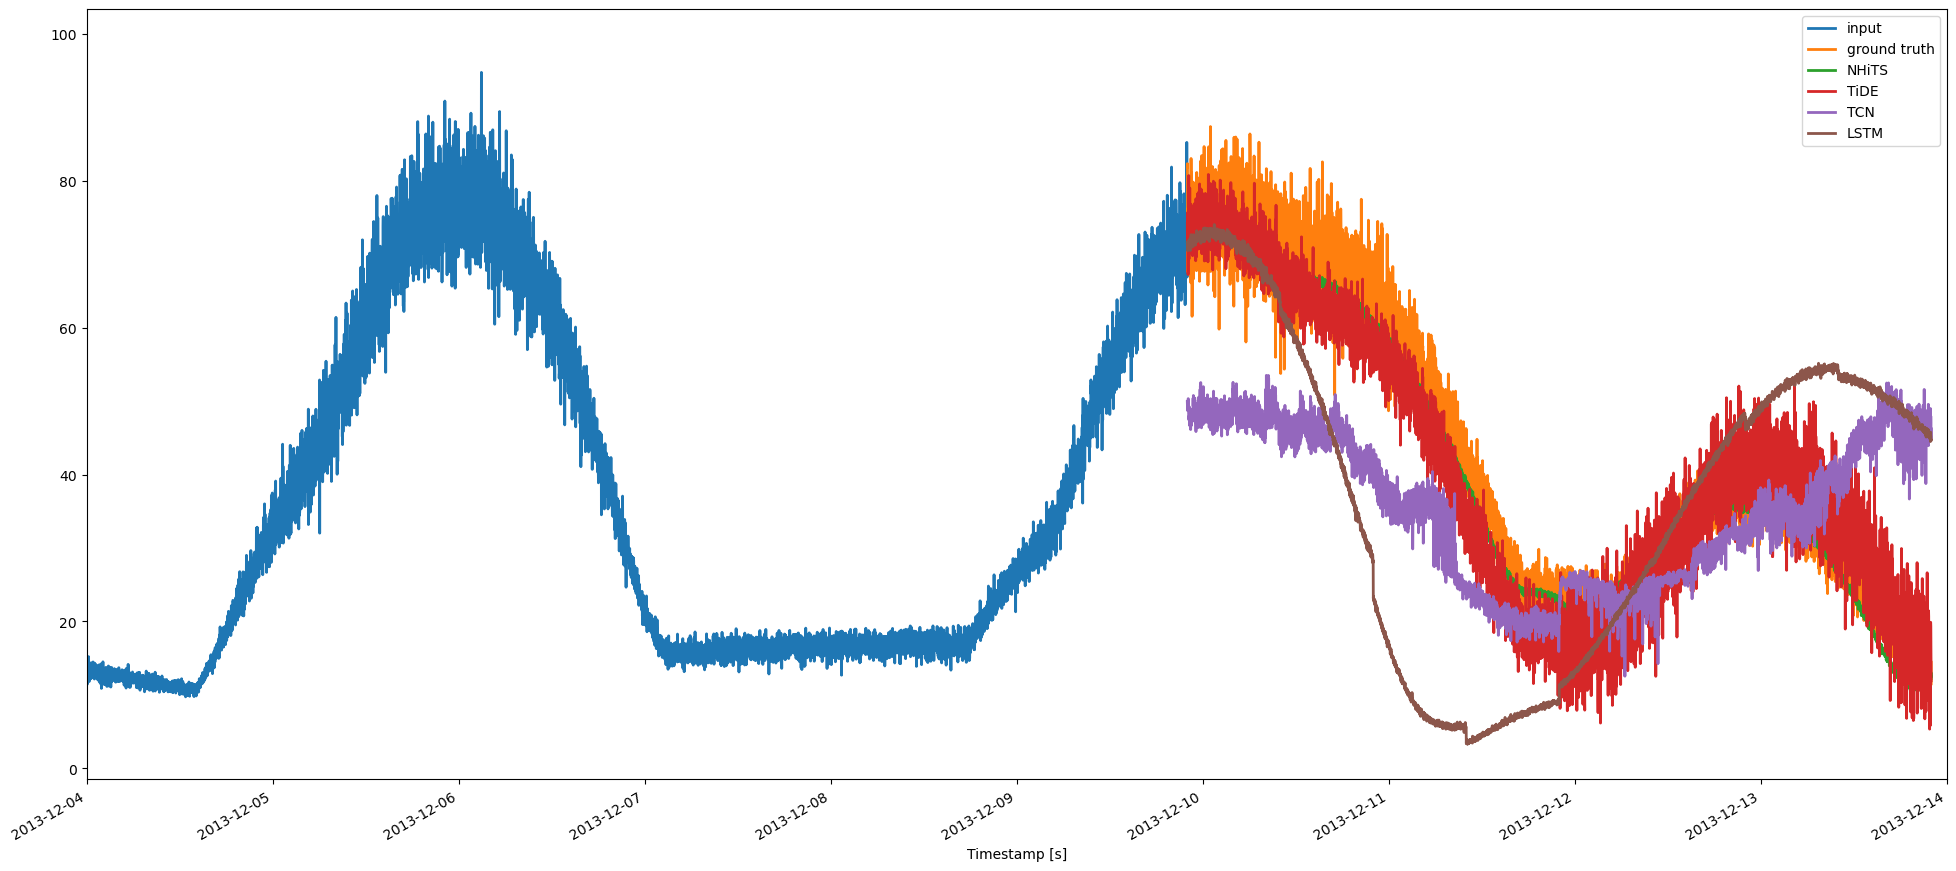

In [21]:
from darts.metrics import quantile_loss

# we will predict the next `pred_steps` points after the end of `pred_input`
pred_steps = 2880 * 2
pred_input = test[:-pred_steps]

# Set the specific start date
start_date = pd.Timestamp("2013-12-4")
end_date = pd.Timestamp("2013-12-14")

fig, ax = plt.subplots(figsize=(24, 10))
plt.xlim(start_date, end_date)

scaler.inverse_transform(pred_input).plot(label="input")
scaler.inverse_transform(test)[-pred_steps:].plot(label="ground truth", ax=ax)

result_accumulator = {}
# predict with each model and compute/store the metrics against the test sets
for model_name, model in models.items():
    pred_series = model.predict(n=pred_steps, series=pred_input)
    scaler.inverse_transform(pred_series).plot(label=model_name, ax=ax)

    result_accumulator[model_name] = {
        "mae": mae(test, pred_series),
        "mse": mse(test, pred_series)
    }

Predicting: |                                                    | 0/? [00:00<?, ?it/s]

Predicting: |                                                    | 0/? [00:00<?, ?it/s]

Predicting: |                                                    | 0/? [00:00<?, ?it/s]

Predicting: |                                                    | 0/? [00:00<?, ?it/s]

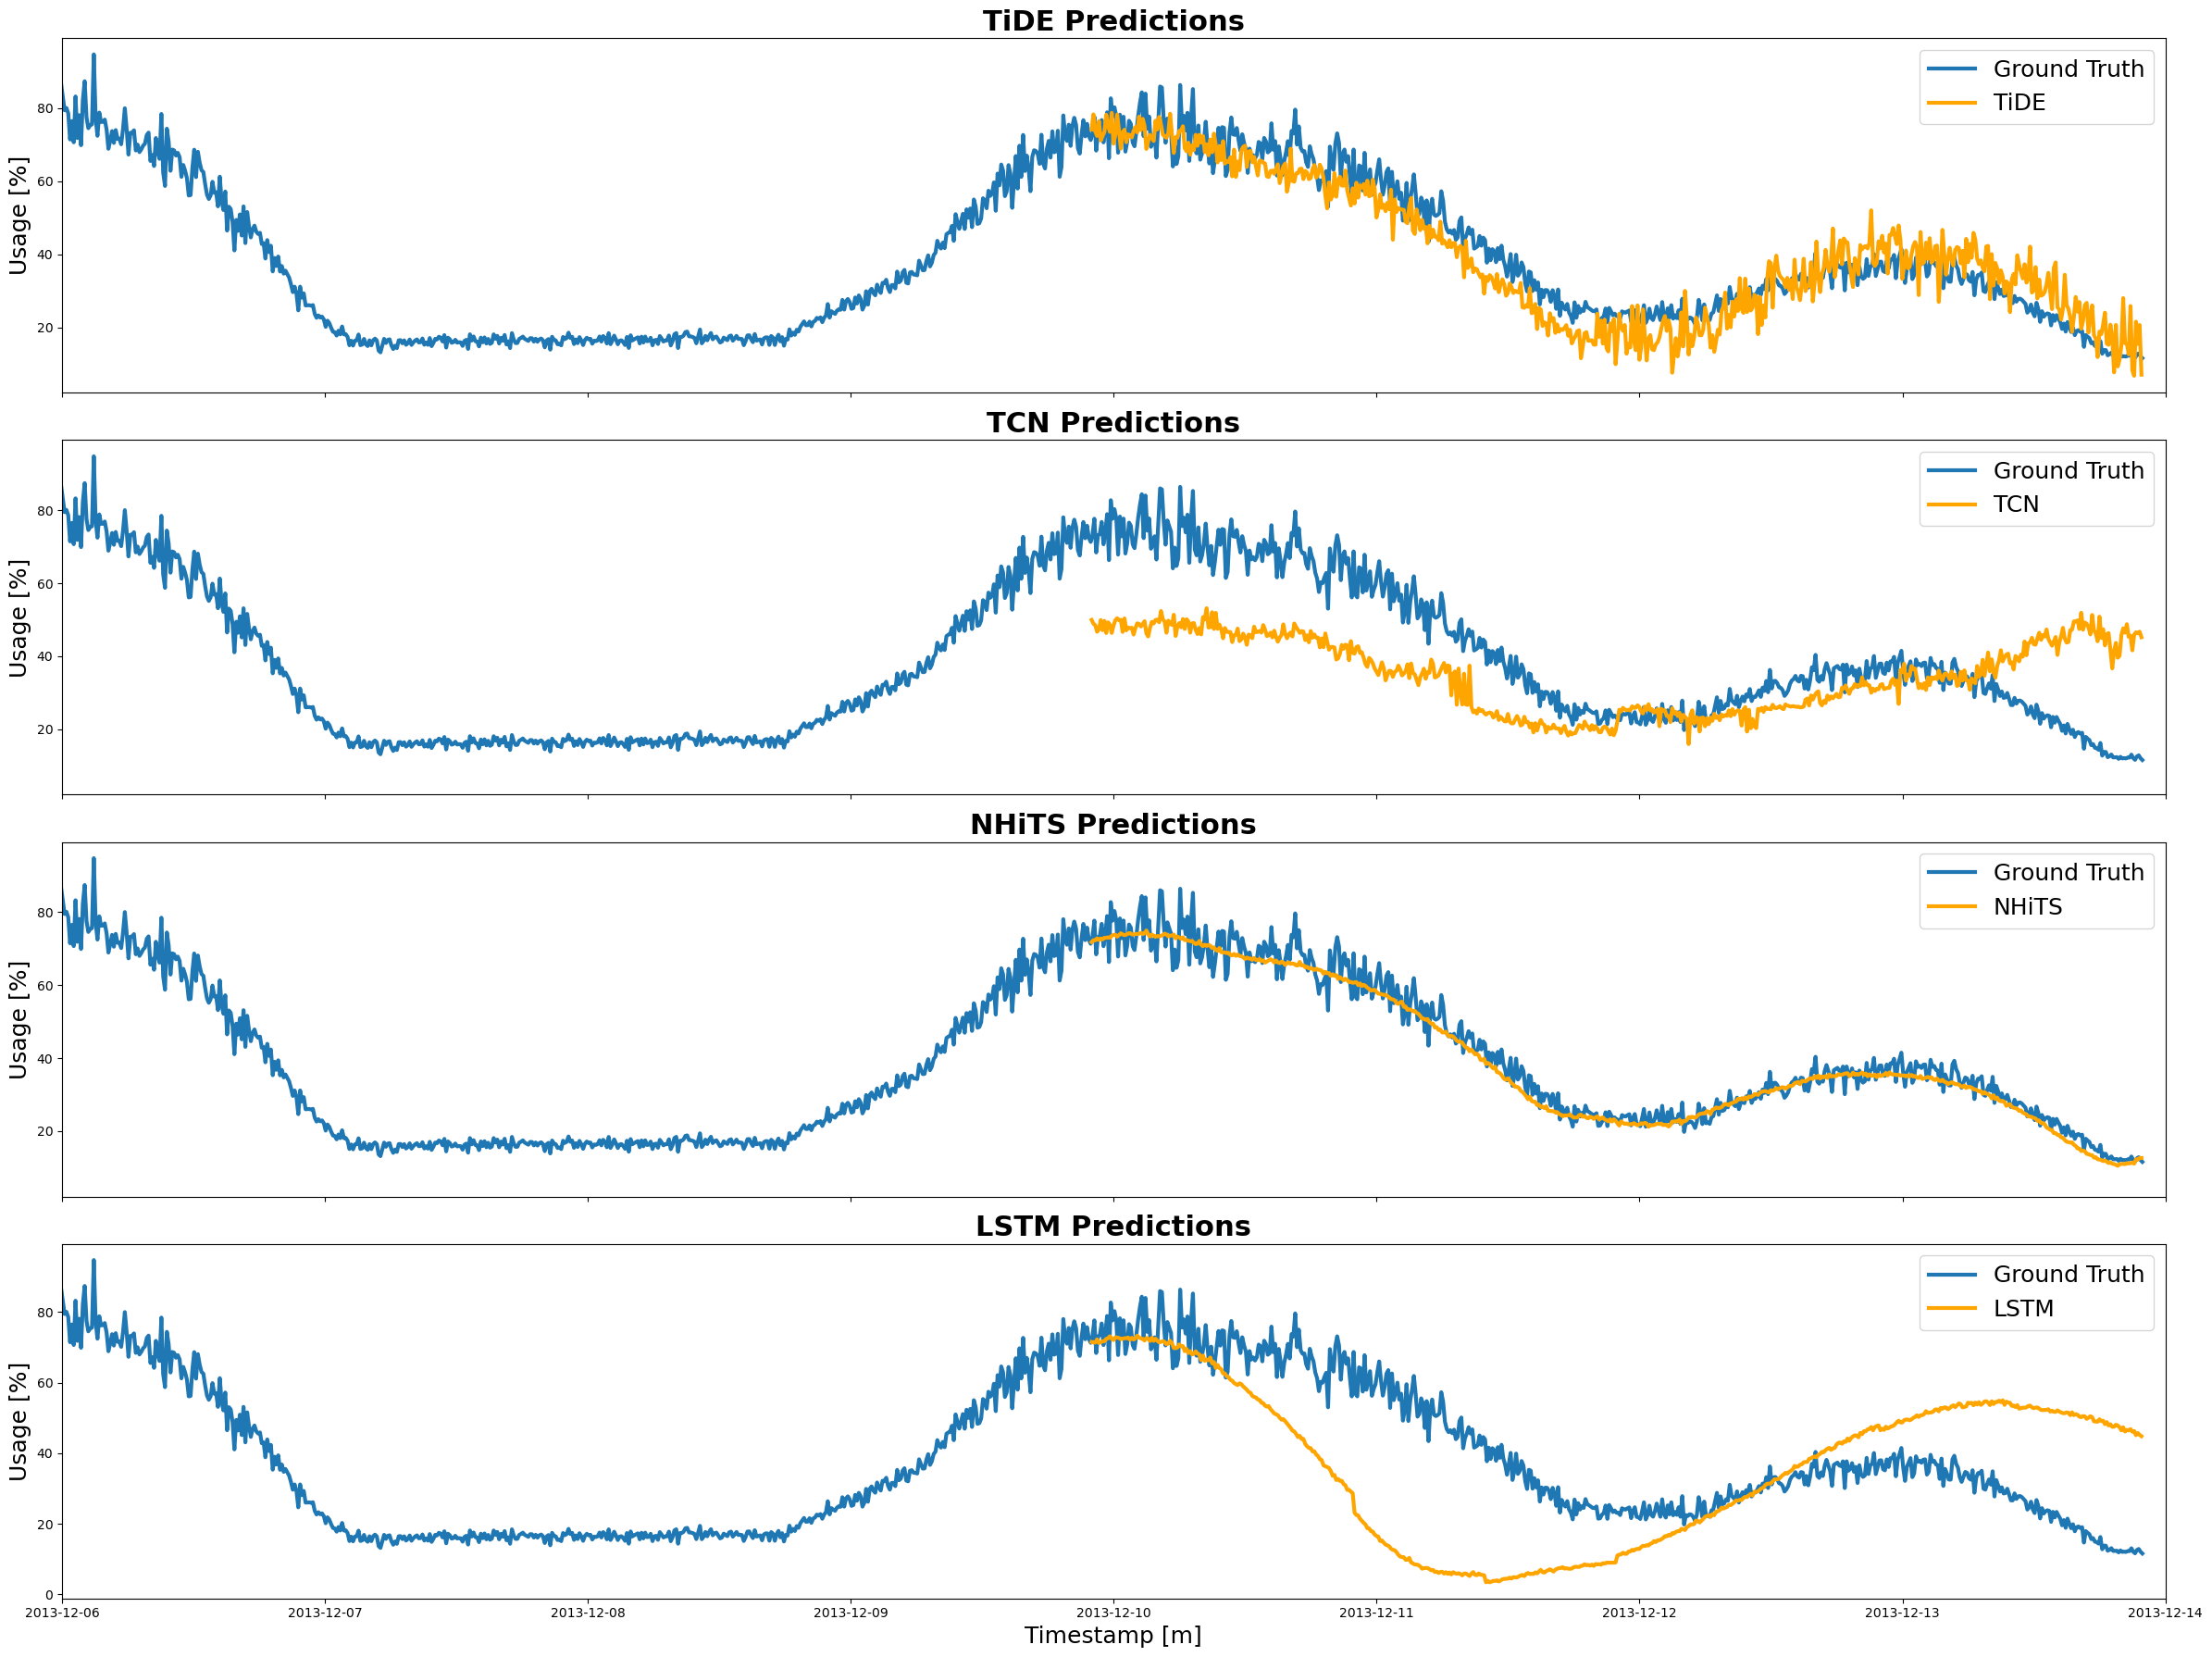

In [22]:
pred_series_tide = model_tide_memory.predict(n=pred_steps, series=pred_input)
pred_series_tcn = model_tcn_memory.predict(n=pred_steps, series=pred_input)
pred_series_nhits = model_nhits_memory.predict(n=pred_steps, series=pred_input)
pred_series_lstm = model_lstm_memory.predict(n=pred_steps, series=pred_input)


pred_series_tide = scaler.inverse_transform(pred_series_tide)
pred_series_tcn = scaler.inverse_transform(pred_series_tcn)
pred_series_nhits = scaler.inverse_transform(pred_series_nhits)
pred_series_lstm = scaler.inverse_transform(pred_series_lstm)
ground_truth = scaler.inverse_transform(test)

# Converting to dataframe for plotting
pred_input = pred_input.pd_dataframe()
pred_series_tide = pred_series_tide.pd_dataframe()
pred_series_tcn = pred_series_tcn.pd_dataframe()
pred_series_nhits = pred_series_nhits.pd_dataframe()
pred_series_lstm = pred_series_lstm.pd_dataframe()
ground_truth = ground_truth.pd_dataframe()


# Setting the timestamp column again
pred_input["Timestamp [s]"] = pred_input.index
pred_series_tide["Timestamp [s]"] = pred_series_tide.index
pred_series_tcn["Timestamp [s]"] = pred_series_tcn.index
pred_series_nhits["Timestamp [s]"] = pred_series_nhits.index
pred_series_lstm["Timestamp [s]"] = pred_series_lstm.index
ground_truth["Timestamp [s]"] = ground_truth.index

# Downsizing the dataframe for better visualization
pred_input = pred_input[::10]
pred_series_tide = pred_series_tide[::10]
pred_series_tcn = pred_series_tcn[::10]
pred_series_nhits = pred_series_nhits[::10]
pred_series_lstm = pred_series_lstm[::10]
ground_truth = ground_truth[::10]

start_date = pd.Timestamp("2013-12-6")
end_date = pd.Timestamp("2013-12-14")

# Set up the subplots
fig, axs = plt.subplots(4, 1, figsize=(24, 18), sharex=True)

# Iterate over each subplot and plot the corresponding data
for ax, model_output, model_name in zip(axs, [pred_series_tide, pred_series_tcn, pred_series_nhits, pred_series_lstm],
                                               ['TiDE', 'TCN', 'NHiTS', 'LSTM']):
    # Plot ground truth
    ax.plot(ground_truth['Timestamp [s]'][-pred_steps:], ground_truth['Memory usage [%]'][-pred_steps:], label='Ground Truth', linewidth=3)
    
    # Plot model output
    ax.plot(model_output['Timestamp [s]'], model_output['Memory usage [%]'], label=model_name, color="orange", linewidth=3)

    # Bold the title for each subplot
    ax.set_title(f'{model_name} Predictions', fontweight='bold', fontsize=22)

    # Set y-axis label for the first subplot only
    ax.set_ylabel('Usage [%]', fontsize=18)

    # Turn off grid lines for the x-axis
    ax.grid(False, axis='x')

    # Set x-axis locator and formatter
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.legend(fontsize=18)

# Set common x-axis label
axs[-1].set_xlabel('Timestamp [m]', fontsize=18)
plt.xlim(start_date, end_date)

# Adjust layout
plt.tight_layout()

# Save the plot to disk (change 'cpu_trend_predictions_subplots.png' to your desired filename and format)
plt.savefig('memory_trend_predictions_subplots.png')

# Show the plot
plt.show()

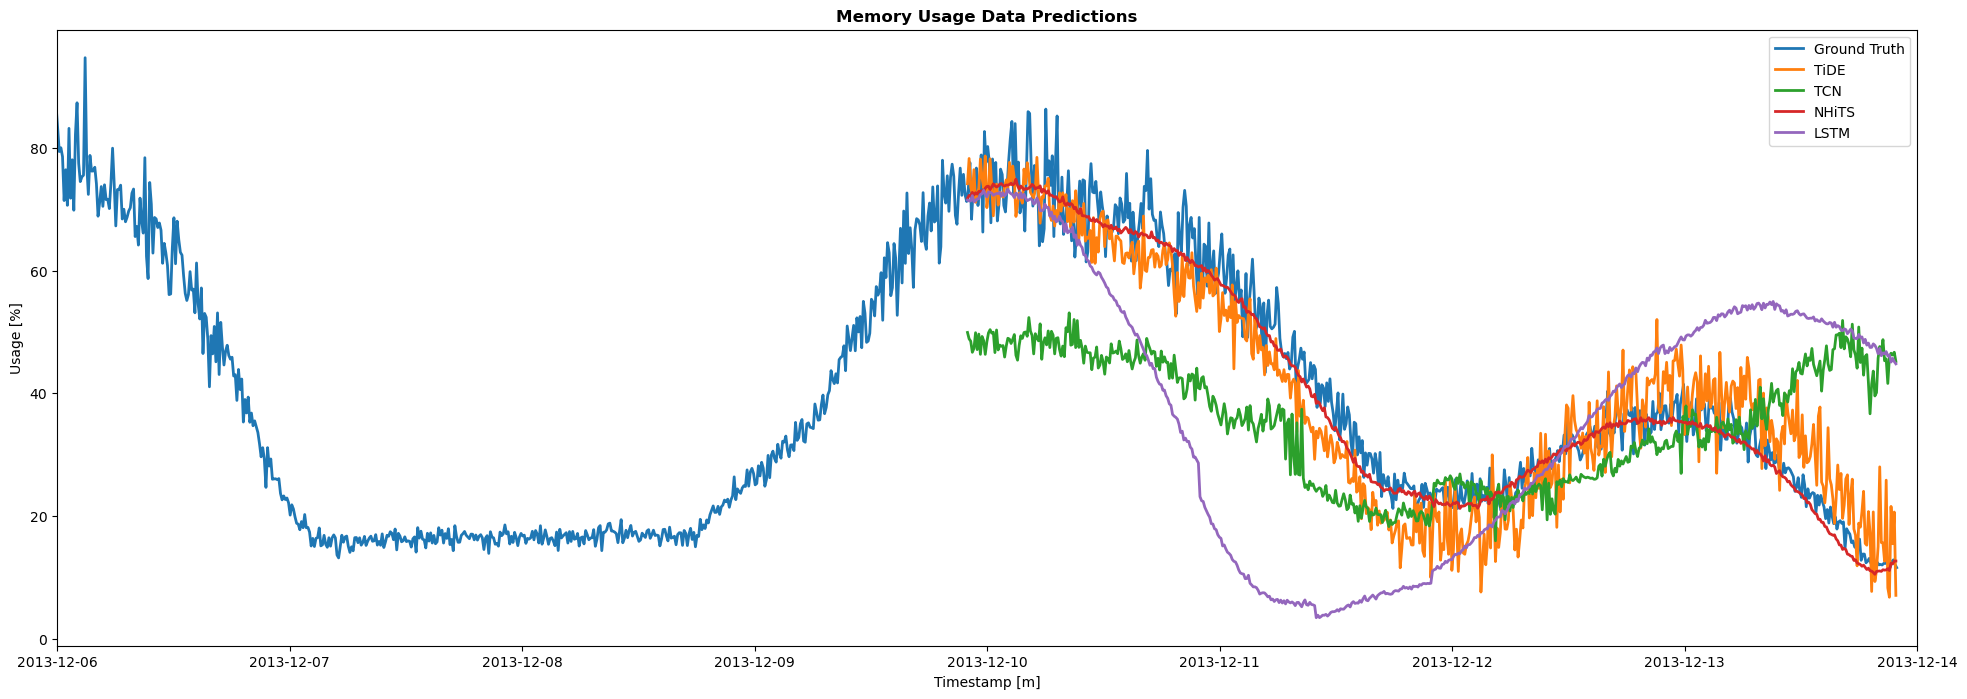

In [10]:
plt.figure(figsize=(24, 8))
start_date = pd.Timestamp("2013-12-6")
end_date = pd.Timestamp("2013-12-14")
plt.xlim(start_date, end_date)


# Plotting the timeseries with customizations
plt.plot(ground_truth['Timestamp [s]'][-pred_steps:], ground_truth['Memory usage [%]'][-pred_steps:], label='Ground Truth', linewidth=2)
plt.plot(pred_series_tide['Timestamp [s]'], pred_series_tide['Memory usage [%]'], label='TiDE', linewidth=2)
plt.plot(pred_series_tcn['Timestamp [s]'], pred_series_tcn['Memory usage [%]'], label='TCN',  linewidth=2)
plt.plot(pred_series_nhits['Timestamp [s]'], pred_series_nhits['Memory usage [%]'], label='NHiTS', linewidth=2)
plt.plot(pred_series_lstm['Timestamp [s]'], pred_series_lstm['Memory usage [%]'], label='LSTM', linewidth=2)

# Bold the title
plt.title('Memory Usage Data Predictions', fontweight='bold')
plt.xlabel('Timestamp [m]')
plt.ylabel('Usage [%]')
plt.legend()

# Turn off grid lines for the x-axis
plt.grid(False, axis='x')

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Save the plot to disk (change 'cpu_trend_predictions.png' to your desired filename and format)
plt.savefig('memory_trend_predictions.png')

# Show the plot
plt.show()



In [22]:
results_df = pd.DataFrame.from_dict(result_accumulator, orient="index")
results_df.head()

,mae,mse
NHiTS,0.029453,0.001527
TiDE,0.064325,0.005906
TCN,0.163508,0.040822
LSTM,0.214351,0.071298


In [93]:
pred_series_nhits = model_nhits_memory.predict(n=pred_steps, series=pred_input)
pred_series_nhits = scaler.inverse_transform(pred_series_nhits)
sample = pred_series_nhits.pd_dataframe()
sample.head(13)

Predicting: |                                                    | 0/? [00:00<?, ?it/s]

component,Memory usage [%]
Timestamp [s],
2013-12-09 21:59:00,71.777958
2013-12-09 22:00:00,71.982993
2013-12-09 22:01:00,72.224752
2013-12-09 22:02:00,72.135143
2013-12-09 22:03:00,72.427164
2013-12-09 22:04:00,72.359488
2013-12-09 22:05:00,72.581069
2013-12-09 22:06:00,72.346585
2013-12-09 22:07:00,72.267944
